# **Stochastic modeling approach based on Monte Carlo methods**

**MOD510: Project 4**

Date: **Desember 1st 2025**

Names: *Malvin Varpe & Torgrim Odde*

**Learning objectives:**
* Understand the principles of Monte Carlo methods and their application in stochastic modelling.
* Develop skills in formulating and solving mass balance equations for single and interconnected systems.
* Quantify uncertainties in simulation results and interpret their implications for system behaviour.
* Compare stochastic simulation outcomes to deterministic ODE solutions, critically analysing their performance and limitations.
* Gain hands-on experience with computational tools for solving engineering problems.

# Astract 
This project investigates stochastic modelling of mixing tanks and contaminant transport using Monte Carlo simulations. For the single-tank system, the Monte Carlo mean concentration closely matched the analytical solution, while the standard deviation showed the expected early decrease, slight divergence due to parameter variability, and eventual exponential collapse. Extending the model to three interconnected tanks demonstrated how uncertainty spread downstream, with later tanks showing delayed peaks in both concentration and variability. The deterministic Ordinary Differential Equation (ODE) solution matches closely with the Monte Carlo means for all tanks. In the second part, random-walk simulations were used to model contaminant spreading in a 2D aquifer. The unbiased walk produced wide spatial spreading and very long arrival times (mean ≈ 1,038,854 years), while a biased walk representing groundwater flow reduced the arrival time to roughly 5992 years; a factor of 173 faster. Overall, the results show how Monte Carlo methods quantify uncertainty and provide physical insight that complements deterministic models.

# Introduction
The purpose of this project is to explore how uncertainty affects transport and mixing processes using Monte Carlo simulation. The work is carried out in two parts. In the first part, we model one mixing tank and then extend the model to a system of three interconnected tanks. Uncertain parameters such as tank volume, inflow and outflow rates, and initial concentrations are sampled from uniform distributions, and the resulting concentration dynamics are compared to deterministic ODE solutions. The goal is to understand how uncertainty influences system behaviour and how it propagates through interconnected systems.

In the second part, we shift from compartment models to a spatial random-walk model used to represent contaminant spreading in a 2D aquifer. Both unbiased and biased walks are simulated to study diffusion-like spreading, concentration patterns, and travel-time distributions. Together, these two parts give hands-on experience with stochastic modelling, uncertainty propagation, and comparison with deterministic formulations.


# Exercise 1 - Stochastic modeling of mixing tanks
### Part 1: Single Mixing Tank with Parameter Uncertainty

**Description:** Explore the effect of parameter uncertainty on contaminant concentration in a single mixing tank using Monte Carlo simulations. Assume that the tank volume remains constant throughout all simulations, even when inflow and outflow rates vary.

1. Derive and solve the governing equation for the solute concentration over
time:
$$\frac{dC}{dt} = \frac{Q_{in}}{V} C_{in} - \frac{Q_{out}}V C,$$
where $C$ is the solute concentration in the tank, $C_{in}$ is the solute concentration of the inflow, $Q_{in}$ and $Q_{out}$ are the inflow and outflow rates, and $V$ is the tank volume (constant).


**Solution 1.1:**

We consider a perfectly mixed tank of constant volume $V$, with mixture entering and leaving but no reactions.

Total mass of the mix in the tank is: 
$$M(t) = C(t)V$$
A mass balance on the mix gives:
$$\frac{dM}{dt} = inflow\;of\;mass - outflow\;of\;mass$$
$$\frac{d}{dt}[C(t)V]=Q_{in}C_{in}-Q_{out}C(t)$$
Since V is constant:
$$V\frac{dC}{dt}=Q_{in}C_{in}-Q_{out}C$$
$$\to \frac{dC}{dt}=\frac{Q_{in}}{V}C_{in}-\frac{Q_{out}}{V}C$$
Which matches the given governing equation.

Then, we can solve the ODE;
$$\frac{dC}{dt}+\frac{Q_{out}}{V}C=\frac{Q_{in}}{V}C_{in}$$
This is a first-order linear ODE of the form:
$$\frac{dC}{dt}+kC=S,\;where\;k=\frac{Q_{out}}{V}\;and\;S=\frac{Q_{in}}{V}C_{in}$$
With the integrating factor $\mu(t)=e^{kt}$.

Then, multiplying the ODE with the integrating factor yields:
$$e^{kt}\frac{dC}{dt}+ke^{kt}C=Se^{kt}$$
Integrate:
$$e^{kt}C=\frac{S}{k}e^{kt}+C_1$$
Divide by $e^{kt}$:
$$C(t)=\frac{S}{k}+C_1e^{-kt}$$
We can then substitute back:
$$\frac{S}{k}=\frac{\frac{Q_{in}}{V}C_{in}}{\frac{Q_{out}}{V}} = \frac{Q_{in}C_{in}}{Q_{out}}$$
And define the steady-state concentration:
$$C_{ss} = \frac{Q_{in}C_{in}}{Q_{out}}$$
And by applying the initial condition $C(0)=C_0$:
$$C_0=C_{ss}+C_1 \to C_1=C_0-C_{ss}$$
We can get the final solution:
$$C(t)=C_{ss}+(C_0-C_{ss})\exp{(-\frac{Q_{out}}{V}t)},\;where\;C_{ss}=\frac{Q_{in}C_{in}}{Q_{out}}$$
The solution shows that $C(t)$ approaches steady-state concentration $C_{ss}=\frac{Q_{in}C_{in}}{Q_{out}}$ exponentially with a time scale $\tau=\frac{V}{Q_{out}}$.

***

2. **Analytical Solution with Average Parameters:** Compute the analytical solution of the single-tank problem using the average values of the parameters:
* $\bar{V} = 1000$ liters
* $\bar{Q} _{out} = 100$ L/s
* $\bar{Q}_{in} = 100$ L/s
* $\bar{C}_{in} = 0.25$ g/L
* $\bar{C}(0) = 3.5$ g/L

Derive the concentration as a function of time using these average parameters.

**Solution 1.2:**

The steady-state concentration is 
$$C_{ss}=\frac{\bar{Q}_{in}\bar{C}_{in}}{\bar{Q}_{out}}=\frac{100*0.25}{100}=0.25\;g/L$$
So here, $C_{ss}=C_{in}$ as expected when $Q_{in}=Q_{out}$.

The decay rate is
$$\frac{\bar{Q}_{out}}{\bar{V}}=\frac{100}{1000}=0.1s^{-1}$$
So the exponential term becomes $\exp(-0.1t)$
With the initial concentration of $C_0=\bar{C}(0)=3.5\;g/L$ we can insert this into the general solution and get
$$C(t)=C_{ss}+(C_0-C_{ss})\exp(-\frac{\bar{Q}_{out}}{\bar{V}}t)=0.25+(3.5-0.25)\exp(-0.1t)=3.5-0.25=3.25$$
Therefore, the final expression is:
$$C(t)=0.25+3.25\exp(-0.1t)\;g/L$$

Using the analytical solution derived in question 1, and substituting the average parameter values, we obtain the cocnentration as a function of time.

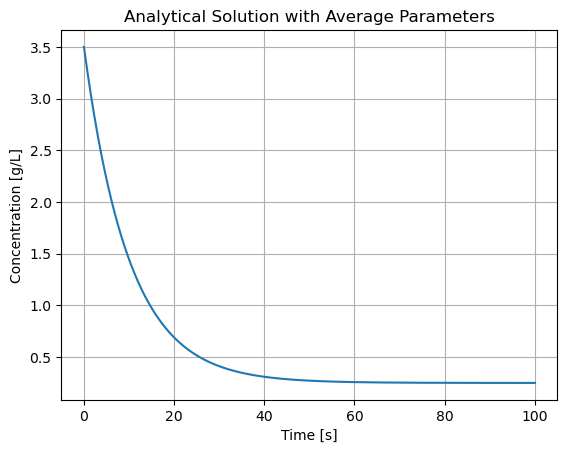

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 100, 400)
C = 0.25 + 3.25 * np.exp(-0.1 * t)

plt.plot(t, C)
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Analytical Solution with Average Parameters")
plt.grid(True)
plt.show()

The plot shows the analytical concentration curve using the average parameter  values. As expected for a continuous stirred tank with $Q_{in}=Q_{out}$, the concentration decreases exponentially from the initial value of $C_0=3.5\;g/L$ towards the steady-state concentration $C_{ss}=0.25\;g/L$ with a decay rate of $\frac{Q}{V}=0.1s^{-1}$.
***

3. Assume that the probability of a gram of fluid to leave the tank over a given time interval $Δt$ is
$$p=1-e^{-\frac{Q_{out}}{V} \Delta t}$$

# [Se på denne]
Oppgaven spør ikke om noe? Men burde vi forklare hva dette betyr selv om? Denne sannsynligheten p er en forutsetning man kan bruke, men vi bruker Monte Carlo i de neste oppgavene istedenfor. Her er et forslag til et svar/kommentar:

**Solution 1.3:**

Because the tank is perfectly mixed, each gram of fluid has an equal chance of being in the outflow stream. The probability that a given gram remains in the tank during a time interval $\Delta t$ follows an exponential survival law with rate $\frac{Q_{out}}{V}$. Therefore, the probability that it leaves during $\Delta t$ is $p$, as expressed in the function above.

The expression for $p$ is consistent with the ODE formulations, since the exponential survival probability is mathematically equivalent to the decay term in $\frac{dC}{dt}=-\frac{Q_{out}}{V}C$.

In our Monte Carlo simulations, we use the ODE-based Euler update rather than a particle-removal scheme based directly on $p$ because the project requires uncertainty propagation in the model parameters, not stochastic particle tracking. Either way, the probability expression $p$ gives physical understanding of the exponential loss term in the governing equation.

4. **Monte Carlo Simulation – Option 1 (Fixed Parameters per Run):**
Perform a Monte Carlo simulation where parameters are sampled once at the beginning of each run and remain constant throughout the run. Use the following uniform distributions:
* $V ∼ Uniform(950, 1050)$ liters
* $Q_{out} = Q_{in} ∼ Uniform(95, 105)$ L/s
* $C_{in} = 0$ g/L
* $C(0) ∼ Uniform(3.4, 3.6)$ g/L

Simulate 1000 time steps for each run and perform 100 independent runs.
Compute:
* Mean concentration across runs
* Standard deviation
* 95% confidence intervals

**Solution 1.4:**

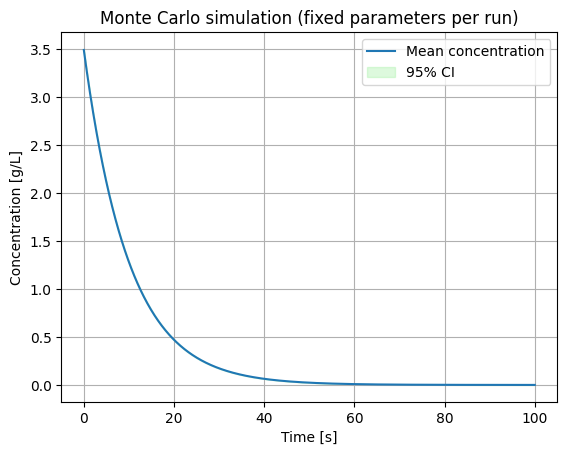

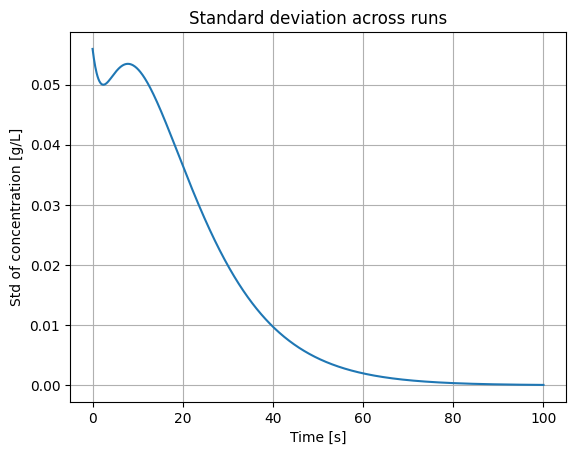

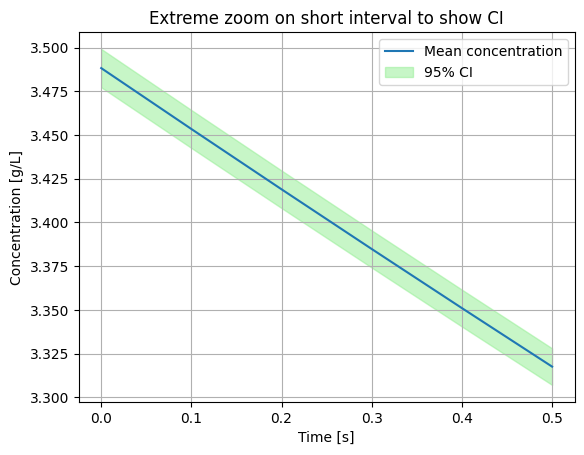

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
n_runs = 100
n_steps = 1000
dt = 0.1  # time step [s], so total time = 100 s
t = np.arange(n_steps + 1) * dt

# Sample parameters (one set per run)
V = np.random.uniform(950.0, 1050.0, size=n_runs)
Q = np.random.uniform(95.0, 105.0, size=n_runs)
C0 = np.random.uniform(3.4, 3.6, size=n_runs)
Cin = 0.0

# Allocate array for concentrations: shape (n_runs, n_steps+1)
C = np.zeros((n_runs, n_steps + 1))
C[:, 0] = C0

# Explicit Euler simulation
factor = 1.0 - (Q / V) * dt
for n in range(n_steps):
    C[:, n+1] = C[:, n] * factor

# Compute statistics across runs at each time step
C1_mean = C.mean(axis=0)
C1_std = C.std(axis=0, ddof=1)
N = n_runs
C1_sem = C1_std / np.sqrt(N)
C1_lower = C1_mean - 1.96 * C1_sem
C1_upper = C1_mean + 1.96 * C1_sem

# Plot mean and CI
plt.figure()
plt.plot(t, C1_mean, label="Mean concentration")
plt.fill_between(t, C1_lower, C1_upper, color='lightgreen',alpha=0.3, label="95% CI")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Monte Carlo simulation (fixed parameters per run)")
plt.legend()
plt.grid(True)
plt.show()

# Plot STD vs time
plt.figure()
plt.plot(t, C1_std)
plt.xlabel("Time [s]")
plt.ylabel("Std of concentration [g/L]")
plt.title("Standard deviation across runs")
plt.grid(True)
plt.show()

# Showing extreme zoom of limited time period
plt.figure()
mask = t <= 0.5  # first 0.5 seconds
plt.plot(t[mask], C1_mean[mask], label="Mean concentration")
plt.fill_between(t[mask], C1_lower[mask], C1_upper[mask], color='lightgreen',alpha=0.5, label="95% CI")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Extreme zoom on short interval to show CI")
plt.legend()
plt.grid(True)
plt.show()


The Monte Carlo simulation was performed with 100 independent runs and 1000 time steps per run. Because parameters are sampled once per run and kept constant throughout, each trajectory follows an exponential decay towards zero, as expected. The combined mean therefore also decays exponentially.

The behavior of the standard deviation is a bit different. Initially it decreases because all concentrations begin to decay simultaneously, reducing the overall spread. It then increases slightly because different runs decay at slightly different rates, causing trajectories to diverge and temporarily increase the variability. Once the decay dominates and all concentrations approach zero, the standard deviations collapses exponentially. 
At $t=0$, the variations is due solely to the uncertainty of the initial concentration $C(0)$, which is sampled from a uniform distribution over $[3.4,3.6]$ g/L. As soon as the simulation begins, an additional source of variability appear: each run decays at a different rate $\lambda_i = \frac{Q_i}{V_i}$, because both $Q$ and $V$ vary across runs. These slightly different decay rates cause the concentration trajectories to separate from one another during the early stages of the simulations. As a result, the standard deviation initially decreases more slowly than a pure exponential because two sources of variability (initial concentration vs. decay rate) are competing. As time increases, the dynamics become dominated by the exponential decay term itself. All trajectories shrink toward zero, regardless of their initial values or decay rates, causing the concentrations to collapse toward a common value. This leads to a clean exponential decline in the standard deviation, eventually approaching zero.

Due to the narrow parameter ranges and the relatively large number of runs (N=100), the 95% confidence intervals of the mean concentration are extremely narrow and visually undistinguishable from the mean curve on the original plot. To show that it is there, we reproduce a second plot with an extreme zoom. This is just for visualization and verification.

***

5. **Monte Carlo Simulation – Option 2 (Parameters Vary at Each Time Step):** Repeat the simulation, but now allow parameters to fluctuate at every time step to represent dynamic variability. For each time step, resample:
* $Q_{in} = Q_{out} ∼ Uniform(95, 105)$ L/s
* $C_{in} = 0$ g/L
  
Keep $V$ and $C(0)$ fixed per run. Compare the uncertainty in concentration between Option 1 and Option 2.

**Solution 1.5:**

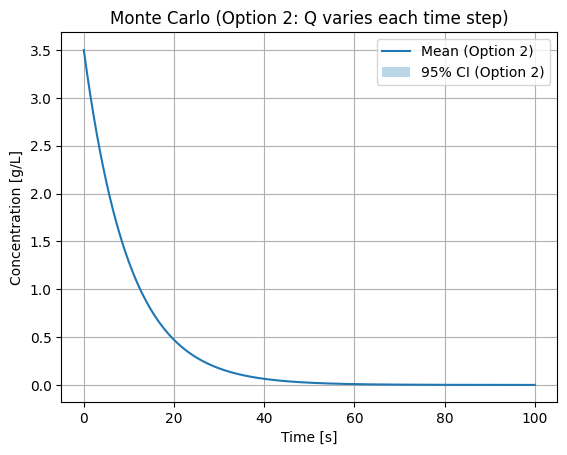

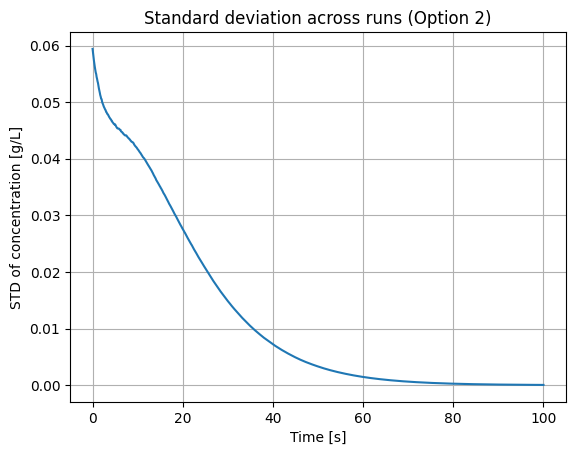

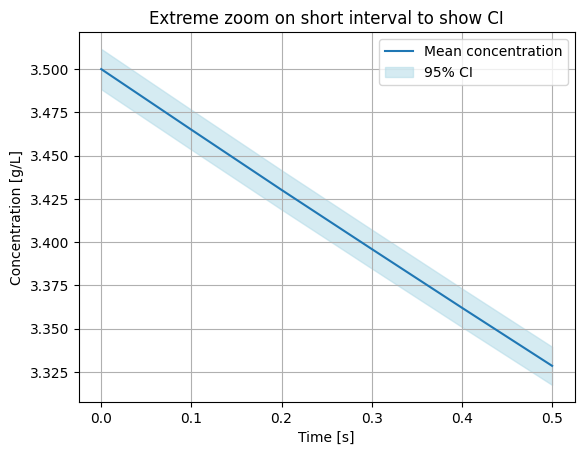

In [3]:
import numpy as np
import matplotlib.pyplot as plt

"""
Now, we aim to set up the Monte Carlo with time varying Q.
V and C(0) are still sampled once per run and kept fixed, but at every step we
resample Q_in = Q_out ~U(95,105) L/s, C_in = 0.
The decay rate will therefore becore a random process in time.
We still use the same ODE and explicit Euler.
"""
# Simulation settings
n_runs = 100
n_steps = 1000
dt = 0.1
t = np.arange(n_steps + 1) * dt

# Parameters: V and C0 fixed per run
V2 = np.random.uniform(950.0, 1050.0, size=n_runs)
C0_2 = np.random.uniform(3.4, 3.6, size=n_runs)
Cin = 0.0

# Allocate concentrations for Option 2
C2 = np.zeros((n_runs, n_steps + 1))
C2[:, 0] = C0_2

# Time-varying Q at each time step
for n in range(n_steps):
    Q_step = np.random.uniform(95.0, 105.0, size=n_runs)   # new Q for this time step
    factor_step = 1.0 - (Q_step / V2) * dt
    C2[:, n+1] = C2[:, n] * factor_step

# Statistics across runs for Option 2
C2_mean = C2.mean(axis=0)
C2_std  = C2.std(axis=0, ddof=1)
N = n_runs
C2_sem  = C2_std / np.sqrt(N)
C2_lower = C2_mean - 1.96 * C2_sem
C2_upper = C2_mean + 1.96 * C2_sem

# Mean + 95% CI
plt.figure()
plt.plot(t, C2_mean, label="Mean (Option 2)")
plt.fill_between(t, C2_lower, C2_upper, alpha=0.3, label="95% CI (Option 2)")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Monte Carlo (Option 2: Q varies each time step)")
plt.legend()
plt.grid(True)
plt.show()

# STD vs time
plt.figure()
plt.plot(t, C2_std)
plt.xlabel("Time [s]")
plt.ylabel("STD of concentration [g/L]")
plt.title("Standard deviation across runs (Option 2)")
plt.grid(True)
plt.show()

# Showing extreme zoom of limited time period
plt.figure()
mask = t <= 0.5  # first 0.5 seconds
plt.plot(t[mask], C2_mean[mask], label="Mean concentration")
plt.fill_between(t[mask], C2_lower[mask], C2_upper[mask], color='lightblue',alpha=0.5, label="95% CI")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Extreme zoom on short interval to show CI")
plt.legend()
plt.grid(True)
plt.show()

In option 2, the Monte Carlo simulations was repeated with the same number of runs (100) and time steps (1000), but with the outflow/inflow rate $Q(t)$ resampled from a uniform distribution $[95, 105]$ L/s at every time step. The tank volume $V$ and the initial concentration $C(0)$ are still sampled once per run and remain fixed. 

The mean concentration across runs show the same behavior: an exponential decay toward zero. This is still as expected since the governing equation still describesa first-order removal process and the small fluctuations in $Q(t)$ even out over the group.

Now, the we see that the STD differs from option 1. At $t=0$, the STD again reflects only the spread in the initial concentration $C(0)$. As the simulation progresses, the variability in the time-dependent decay rate $\lambda(t)=\frac{Q(t)}{V}$ introduce an additional source of randomness. Because each trajectory experiences a difference sequence of flow values, the runs diverge in a more irregular manner than for option 1. Either way, since $V$ is fixed per run and $Q(t)$ fluctuates within a narrow interval, the variability introduced by these fluctutations remain relatively small.
Therefore, the STD for option 2 shows a smoother early-time behavior and a lower peak. This is because the uncertainty is now dominated by the random differences in $Q(t)$ at each time step, rather than fixed differences in decay rates across runs. As time increases, the decay term again dominate the dynamics and all concentrations shrink to zero, again forcing the STD to collapse exponentially.

The 95% CI around the mean is again extremely narrow. To visualize it, we zoom in on a very small time interval (0.5) just to confirm its presence.

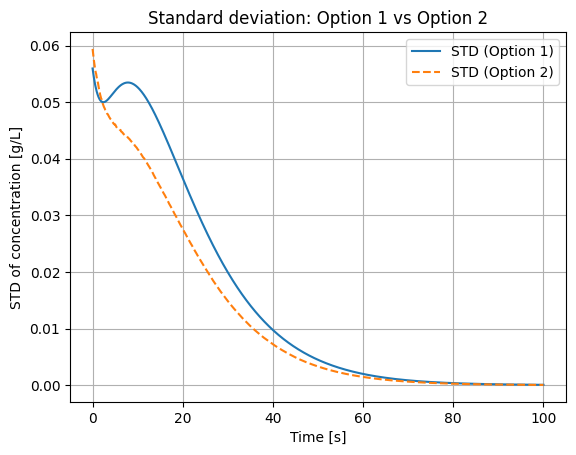

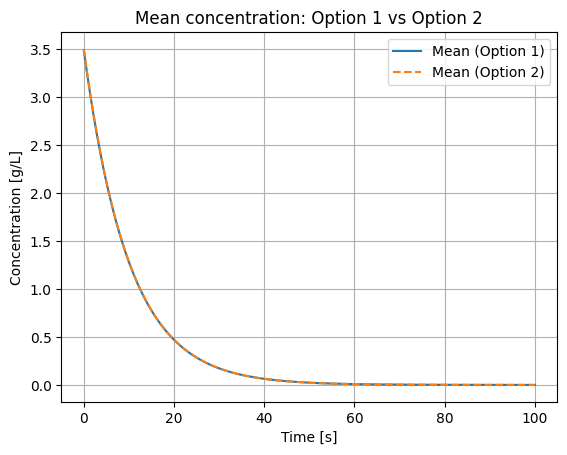

In [4]:
# Comparison of STD, CI and Mean Concentration for Option 1 and 2
plt.figure()
plt.plot(t, C1_std, label="STD (Option 1)")
plt.plot(t, C2_std, label="STD (Option 2)", linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("STD of concentration [g/L]")
plt.title("Standard deviation: Option 1 vs Option 2")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, C1_mean, label="Mean (Option 1)")
plt.plot(t, C2_mean, label="Mean (Option 2)", linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Mean concentration: Option 1 vs Option 2")
plt.legend()
plt.grid(True)
plt.show()


The comparison plots show that the mean concentration is visually identical for the two simulation options. This confirms that allowing $Q(t)$ to fluctuate at each time step does not significantly affect the expected concentration trajectory, because the decay mechanism is linear and $C_{in}=0$, causing randomness in $Q(t)$ to average out.

The largest difference appear in the standard deviation as meantioned.
* Option 1 (fixed paramters per run) shows a more distinct early-time peak in STD.
* Option 2 (time-varying parameters) shows a smoother and lower STD curve.
At long times, both options sho the concentrations decay toward zero.

***

# Løser part 3-5 igjen, men bruker 'p' denne gangen

**Solution 1.3:**

Because the tank is perfectly mixed, each gram of fluid has an equal chance of being in the outflow stream. The probability that a given gram remains in the tank during a time interval $\Delta t$ follows an exponential survival law with rate $\frac{Q_{out}}{V}$. Therefore, the probability that it leaves during $\Delta t$ is:
$$p=1-e^{-\frac{Q_{out}}{V}\Delta t}$$

In the Monte Carlo simulations, we will use this probability directly in a particle-based model. The initial mixture mass is represented by a discrete number of "grams" and during each time step every gram has probability $p$ og leaving the tank. This is the same as sampling the number of surviving grams from a binomial distribution. In expectation, this particle reproduces the exponential decay in the ODE $\frac{dC}{dt}=-\frac{Q_{out}}{V}C$, but it also introduces an additional source of randomness due to the discrete survival events.

**Solution 1.4:**

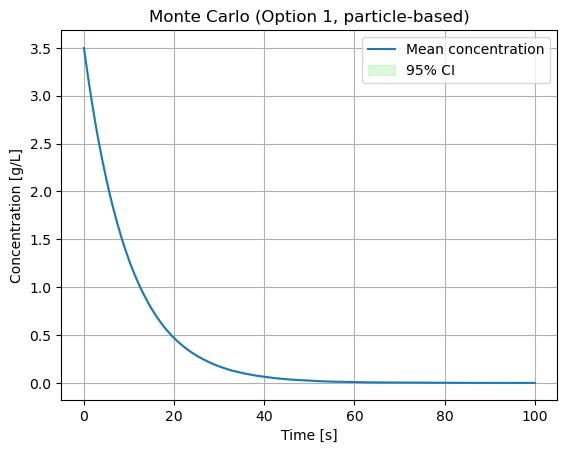

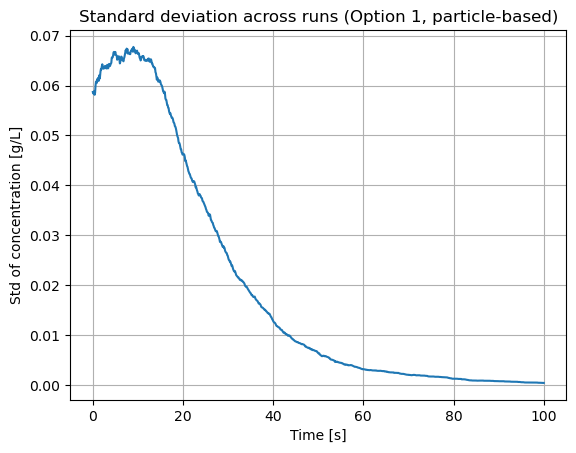

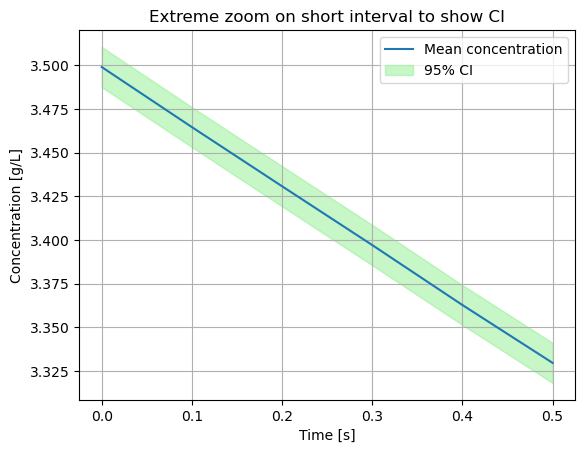

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
n_runs = 100
n_steps = 1000
dt = 0.1  # [s]
t = np.arange(n_steps + 1) * dt

# Sample parameters (one set per run)
V = np.random.uniform(950.0, 1050.0, size=n_runs)
Q = np.random.uniform(95.0, 105.0, size=n_runs)
C0 = np.random.uniform(3.4, 3.6, size=n_runs)
Cin = 0.0

# Initial number of grams in each run: M0 = C0 * V
N0 = np.round(C0 * V).astype(int)   # one particle = 1 gram

# Allocate array for particle counts and concentrations
N = np.zeros((n_runs, n_steps + 1), dtype=int)
N[:, 0] = N0

C = np.zeros((n_runs, n_steps + 1))
C[:, 0] = C0

# Probability of a gram leaving per time step (fixed per run)
p_leave = 1.0 - np.exp(- (Q / V) * dt)

# Monte Carlo simulation using binomial thinning
for n in range(n_steps):
    # number of survivors after this time step
    survivors = np.random.binomial(N[:, n], 1.0 - p_leave)
    N[:, n+1] = survivors
    C[:, n+1] = N[:, n+1] / V  # concentration = grams / volume

# Statistics across runs
C1_mean = C.mean(axis=0)
C1_std = C.std(axis=0, ddof=1)
N_runs = n_runs
C1_sem = C1_std / np.sqrt(N_runs)
C1_lower = C1_mean - 1.96 * C1_sem
C1_upper = C1_mean + 1.96 * C1_sem

# Plot mean and CI
plt.figure()
plt.plot(t, C1_mean, label="Mean concentration")
plt.fill_between(t, C1_lower, C1_upper, color='lightgreen', alpha=0.3, label="95% CI")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Monte Carlo (Option 1, particle-based)")
plt.legend()
plt.grid(True)
plt.show()

# Plot STD vs time
plt.figure()
plt.plot(t, C1_std)
plt.xlabel("Time [s]")
plt.ylabel("Std of concentration [g/L]")
plt.title("Standard deviation across runs (Option 1, particle-based)")
plt.grid(True)
plt.show()

# Extreme zoom for CI
plt.figure()
mask = t <= 0.5
plt.plot(t[mask], C1_mean[mask], label="Mean concentration")
plt.fill_between(t[mask], C1_lower[mask], C1_upper[mask],
                 color='lightgreen', alpha=0.5, label="95% CI")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Extreme zoom on short interval to show CI")
plt.legend()
plt.grid(True)
plt.show()


In addition to parameter uncertainty, there is a small contribution to the standard deviation from the discrete binomial sampling of surviving grams, but with initial mass of order 3500g this noise is relatively small compared to the effect of parameter variability.

**Solution 1.5:**

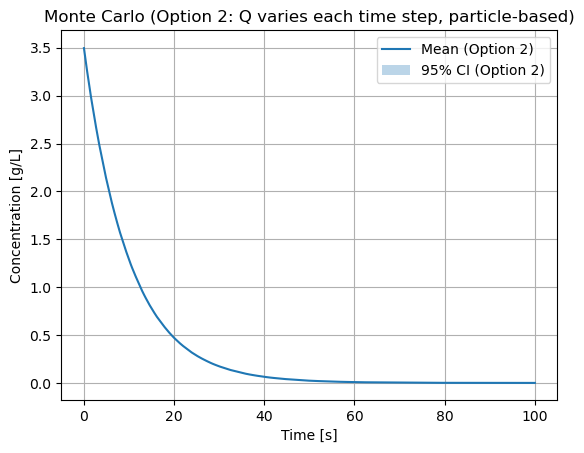

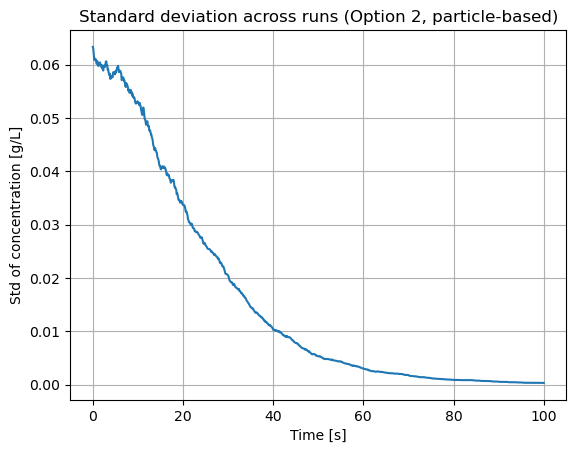

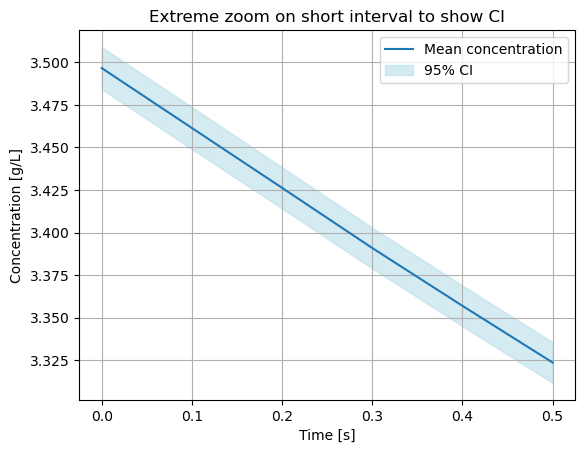

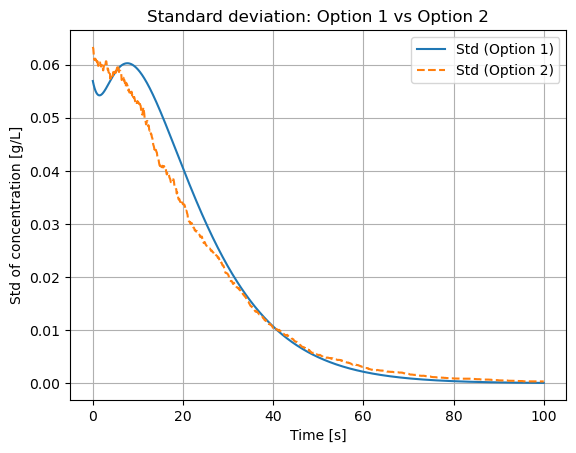

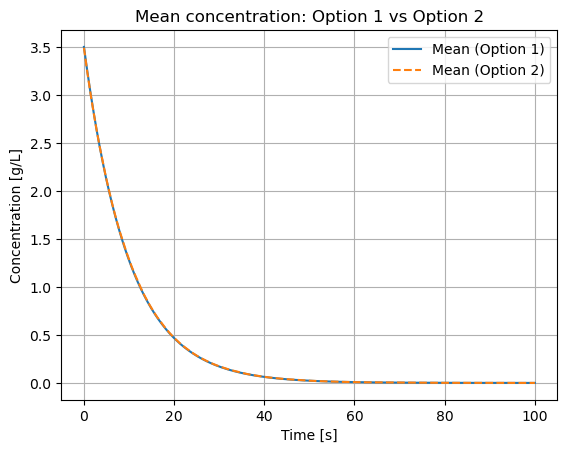

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
n_runs = 100
n_steps = 1000
dt = 0.1
t = np.arange(n_steps + 1) * dt

# Parameters: V and C0 fixed per run
V2 = np.random.uniform(950.0, 1050.0, size=n_runs)
C0_2 = np.random.uniform(3.4, 3.6, size=n_runs)
Cin = 0.0

# Initial mass and particle counts
N0_2 = np.round(C0_2 * V2).astype(int)

N2 = np.zeros((n_runs, n_steps + 1), dtype=int)
N2[:, 0] = N0_2

C2 = np.zeros((n_runs, n_steps + 1))
C2[:, 0] = C0_2

# Time-varying Q at each time step
for n in range(n_steps):
    Q_step = np.random.uniform(95.0, 105.0, size=n_runs)
    p_leave_step = 1.0 - np.exp(- (Q_step / V2) * dt)
    survivors = np.random.binomial(N2[:, n], 1.0 - p_leave_step)
    N2[:, n+1] = survivors
    C2[:, n+1] = N2[:, n+1] / V2

# Statistics across runs
C2_mean = C2.mean(axis=0)
C2_std  = C2.std(axis=0, ddof=1)
N_runs = n_runs
C2_sem  = C2_std / np.sqrt(N_runs)
C2_lower = C2_mean - 1.96 * C2_sem
C2_upper = C2_mean + 1.96 * C2_sem

# Mean + 95% CI
plt.figure()
plt.plot(t, C2_mean, label="Mean (Option 2)")
plt.fill_between(t, C2_lower, C2_upper, alpha=0.3, label="95% CI (Option 2)")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Monte Carlo (Option 2: Q varies each time step, particle-based)")
plt.legend()
plt.grid(True)
plt.show()

# STD vs time
plt.figure()
plt.plot(t, C2_std)
plt.xlabel("Time [s]")
plt.ylabel("Std of concentration [g/L]")
plt.title("Standard deviation across runs (Option 2, particle-based)")
plt.grid(True)
plt.show()

# Extreme zoom
plt.figure()
mask = t <= 0.5
plt.plot(t[mask], C2_mean[mask], label="Mean concentration")
plt.fill_between(t[mask], C2_lower[mask], C2_upper[mask],
                 color='lightblue', alpha=0.5, label="95% CI")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Extreme zoom on short interval to show CI")
plt.legend()
plt.grid(True)
plt.show()

# Comparison with Option 1
plt.figure()
plt.plot(t, C1_std, label="Std (Option 1)")
plt.plot(t, C2_std, label="Std (Option 2)", linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Std of concentration [g/L]")
plt.title("Standard deviation: Option 1 vs Option 2")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, C1_mean, label="Mean (Option 1)")
plt.plot(t, C2_mean, label="Mean (Option 2)", linestyle='--')
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Mean concentration: Option 1 vs Option 2")
plt.legend()
plt.grid(True)
plt.show()


In addition to previously discussed results, we see that the particle-based formulation adds small binomial noise due to the random survival of individual grams, but this effect is minor compared to the variability introduced by the parameter fluctuations.

### Part 2: Three Interconnected Tanks with Parameter Uncertainty

**Description:** Extend the model to a system of three interconnected tanks with inflows, outflows, and interconnecting flow between tanks. Assume that the volume of each tank remains constant throughout all simulations.

1. **Formulate the System of Equations:** Write the governing equations
for the solute concentrations in all three tanks:

$$\frac{dC_1}{dt}=\frac{Q_{in}}{V}C_{in} - \frac{Q_{out}}{V}C_1$$
$$\frac{dC_2}{dt}=\frac{Q_{in}}{V}C_{1} - \frac{Q_{out}}{V}C_2$$
$$\frac{dC_3}{dt}=\frac{Q_{in}}{V}C_{2} - \frac{Q_{out}}{V}C_3$$

**Solution 2.1:**

Similar to part 1, but with a three-tank setup.

Mass in tank 1: $M_1=C_1V$
$$\frac{d}{dt}(C_1V)=QC_{in}-QC_1$$
Since $V$ is constant:
$$V\frac{dC_1}{dt}=QC_{in}-QC_1 \to \frac{dC_1}{dt}=\frac{Q}{V}C_{in}-\frac{Q}{V}C_1$$
which matches
$$\frac{dC_1}{dt}=\frac{Q_{in}}{V}C_{in}-\frac{Q_{out}}{v}C_1$$

Mass in tank 2: $M_2=C_2V$
Inflow no has concentration $C_1$:
$$\frac{d}{dt}(C_2V)=QC_1-QC_2$$
$$V\frac{dC_2}{dt}=QC_1-QC_2 \to \frac{dC_2}{dt}=\frac{Q}{V}C_1-\frac{Q}{V}C_2$$
which matches
$$\frac{dC_2}{dt}=\frac{Q_{in}}{V}C_1-\frac{Q_{out}}{V}C_2$$

Mass in tank 3: $M_3=C_3V$
Inflow now has concentration $C_2$
$$\frac{d}{dt}(C_3V)=QC_1-QC_3$$
$$V\frac{dC_3}{dt}=QC_2-QC_3 \to \frac{dC_3}{dt}=\frac{Q}{V}C_2-\frac{Q}{V}C_3$$
which matches
$$\frac{dC_3}{dt}=\frac{Q_{in}}{V}C_2-\frac{Q_{out}}{V}C_3$$

So the governing system is exactly:
$$\frac{dC_1}{dt}=\frac{Q_{in}}{V}C_{in}-\frac{Q_{out}}{v}C_1$$
$$\frac{dC_2}{dt}=\frac{Q_{in}}{V}C_1-\frac{Q_{out}}{V}C_2$$
$$\frac{dC_3}{dt}=\frac{Q_{in}}{V}C_2-\frac{Q_{out}}{V}C_3$$

***

2. **Monte Carlo Simulation (Fixed Parameters per Run):** Perform a
Monte Carlo simulation where parameters are sampled once at the beginning of each run and remain constant throughout the run:
* $V ∼ Uniform(950, 1050)$ liters
* $Q_{in} = Q_{out} ∼ Uniform(95, 105)$ L/s
* $C_{in} = 0$ g/L
* Initial concentrations:
    * $C_1(0) ∼ Uniform(3.4, 3.6)$ g/L,
    * $C_2(0),C_3(0) ∼ Uniform(0, 0.1)$ g/L.

Simulate 1000 time steps for each run and perform 100 independent runs.
Compute mean, standard deviation, and confidence intervals for all three tanks.

**Solution 2.2:**

Doing the same as for part 1, but in vector form for the Monte Carlo three tanks using initial conditions derived above, explicit Euler and time step Δt as shown below:
$$C_x^{n+1} = C_x^n+\Delta t(-\frac{Q}{V}C_x^n)=C_x^n(1-\frac{Q}{V}\Delta t)\; for\; x=[1,2,3]$$



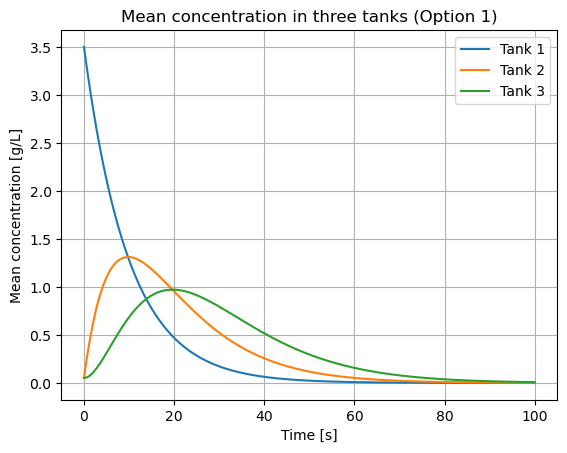

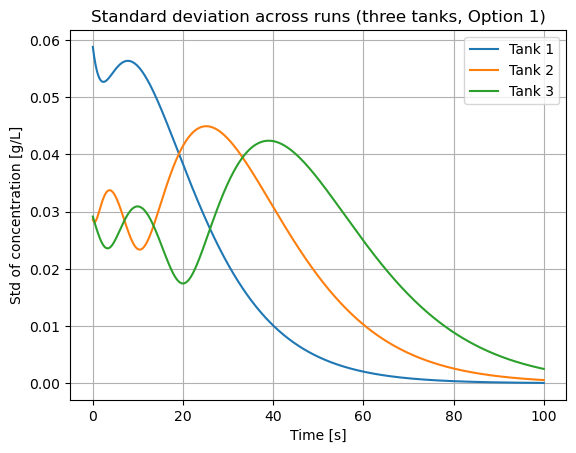

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation settings
n_runs = 100
n_steps = 1000
dt = 0.1
t = np.arange(n_steps + 1) * dt

# Sample parameters (fixed per run)
V = np.random.uniform(950.0, 1050.0, size=n_runs)
Q = np.random.uniform(95.0, 105.0, size=n_runs)
Cin = 0.0
C1_0 = np.random.uniform(3.4, 3.6, size=n_runs)
C2_0 = np.random.uniform(0.0, 0.1, size=n_runs)
C3_0 = np.random.uniform(0.0, 0.1, size=n_runs)

# Allocate concentration arrays: shape (n_runs, n_steps+1)
C1 = np.zeros((n_runs, n_steps + 1))
C2 = np.zeros((n_runs, n_steps + 1))
C3 = np.zeros((n_runs, n_steps + 1))

C1[:, 0] = C1_0
C2[:, 0] = C2_0
C3[:, 0] = C3_0

# Precompute common decay factor
decay = 1.0 - (Q / V) * dt
coupling = (Q / V) * dt

# Time stepping
for n in range(n_steps):
    C1[:, n+1] = C1[:, n] * decay                        # pure decay
    C2[:, n+1] = C2[:, n] * decay + coupling * C1[:, n]  # inflow from tank 1
    C3[:, n+1] = C3[:, n] * decay + coupling * C2[:, n]  # inflow from tank 2

# Statistics across runs for each tank
N = n_runs

def stats(C):
    C_mean = C.mean(axis=0)
    C_std  = C.std(axis=0, ddof=1)
    C_sem  = C_std / np.sqrt(N)
    C_lower = C_mean - 1.96 * C_sem
    C_upper = C_mean + 1.96 * C_sem
    return C_mean, C_std, C_lower, C_upper

C1_mean, C1_std, C1_lower, C1_upper = stats(C1)
C2_mean, C2_std, C2_lower, C2_upper = stats(C2)
C3_mean, C3_std, C3_lower, C3_upper = stats(C3)

plt.figure()
plt.plot(t, C1_mean, label="Tank 1")
plt.plot(t, C2_mean, label="Tank 2")
plt.plot(t, C3_mean, label="Tank 3")
plt.xlabel("Time [s]")
plt.ylabel("Mean concentration [g/L]")
plt.title("Mean concentration in three tanks (Option 1)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(t, C1_std, label="Tank 1")
plt.plot(t, C2_std, label="Tank 2")
plt.plot(t, C3_std, label="Tank 3")
plt.xlabel("Time [s]")
plt.ylabel("Std of concentration [g/L]")
plt.title("Standard deviation across runs (three tanks, Option 1)")
plt.legend()
plt.grid(True)
plt.show()


The mean concentration profiles for the three interconnected tanks show the transport and dilution dynamics of a series of perfectly mixed reactors.
Tank 1 (blue) shows a rapid exponential decay from its initial concentration since it receives no solute inflow ($C_{in}=0$).
Tank 2 (orange) and tank 3 (green) reach their peak concentrations leater, reflecting the time required for the mixture to pass sequentially from tank 1, to tank 2 and to tank 3.
Tank 2 peaks earlier and at a slightly higher concentration compared to tank 3, which accumulates solute more slowly due to being downstream in the cascade.
Eventually, all three tanks decay toward zero as the solute is flushed from the system.

The STD capture how paramter uncertainty behaves through the chain of tanks.
Tank 1 shows an early-time peak in STD similar to the single-tank case, which comes from the spread in initial concentrations and variation in decay rates across rates as discussed earlier.
Tank 2 and 3 display larger and progressively later peaks in STD, matching the delayed and smootehd arrival of mixture from the upstream tanks. The uncertainty is moveing through the system similar to the solute: Tank 2 inherits the variability from tank 1, amplifies it slightly due to its own uncertain initial value, and then passes it to tank 3. As in the single-tank model, all STD eventually collapse exponentially toward zero once the concentrations decay and the system approaches complete flushing of the mixture.

Since the paramater ranges remain narrom and the number of runs is large, the 95% CI of the mean are again extremely narrow and visually indistinguishable on the plots at full scale. 
The dominant effect observed in this three-tank setup is therefore not the widening of CI, but the shifting, fading and dispersion of uncertainty as solute moves through the successive tanks.

***

### Part 3: Validation Against ODE Solutions

**Description:** Solve the system of ODEs analytically (if possible) or numerically using the average values of the parameters:
* $\bar{V} = 1000$ liters, $\bar{Q}_{in} = \bar{Q}_{out} = 100$ L/s
* $\bar{C}_{in} = 0.25$ g/L, $\bar{C}_1(0) = 3.5$ g/L, $\bar{C}_2(0) = \bar{C}_3(0) = 0$ g/L

1. Compare the Monte Carlo simulation results to the deterministic ODE
solution.

2. Evaluate accuracy, consistency, and computational efficiency of the stochastic approach.

3. Discuss advantages and limitations of Monte Carlo methods versus deterministic ODE solutions.

**Solution 3.1:**

Analytically, we can solve the linear system via matrix exponentials.
Numerically, we can solve it using the same discretization as for the Monte Carlo simulations.
We will try to show the analytical version first.

The 3-tank ODE system can be written in matrix form: 
$$\frac{d}{dt}\begin{pmatrix}C_1\\C_2\\C_3\end{pmatrix}=\begin{pmatrix}-k & 0 & 0\\k & -k & 0\\0 & k & -k \end{pmatrix} \begin{pmatrix}C_1\\C_2\\C_3 \end{pmatrix} + \begin{pmatrix}kC_{in}\\0\\0\end{pmatrix},\; k=\frac{Q}{V}$$
Which is a linear nonhomogeneous system.
The standard analytical solution requires 3 things:
1. The matrix exponential $e^{At}$.

Lower triangular matrix, with all $-k$ eigenvalues. The matrix is not diagonalizable, and it only has one eigenvalue with multiplicity 3 and a chained structure. This means the anaytical solution involves $e^{-kt}, te^{-kt}\; and\; t^2e^{-kt}$, which is more complicated than a simple exponential as we worked with earlier.

2. The non-homogeneous part.
 
We need a particular solution for the forcing term (introducing additional exponential terms and shifting constants):
$$\begin{pmatrix}kC_{in}\\0\\0\end{pmatrix}$$

3. Applying initial conditions.

We need to solve a 3x3 linear system to find our constants for the three tanks.

Tank 1: $C_1(t) = C_{in}+(C_1(0)-C_{in})e^{-kt}$

Tank 2:
$C_t(t)=C_{in}+e^{-kt}(C_2(0)-C_1(0))+kte^{-kt}(C_1(0)-C_{in}$

Tank 3: 
$C_3(t)=C_{in}+e^{-kt}(C_3(0)-C_2(0))+kte^{-kt}(C_2(0)-C_1(0))+\frac{(kt)^2}{2}e^{-kt}(C_1(0)-C_{in})$

We see that tank 1 has exponential,  tank 2 has exponential + $te^{-kt}$ and tank 3 has exponential + $te^{-kt}+t^2e^{kt}$.

So the analyitical solution is solvable, but becomes very complicated and messy. Instead, we can use the numerical solution which is much easier and provides an almost identical result.

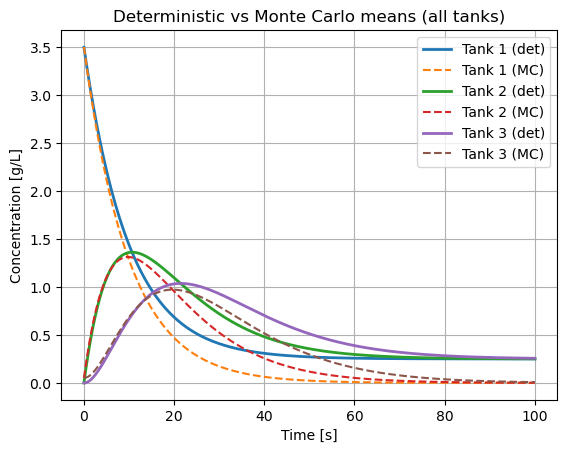

In [93]:
import numpy as np
import matplotlib.pyplot as plt

dt = 0.1
n_steps = 1000
t = np.arange(n_steps + 1) * dt

C1_det = np.zeros(n_steps + 1)
C2_det = np.zeros(n_steps + 1)
C3_det = np.zeros(n_steps + 1)

C1_det[0] = 3.5
C2_det[0] = 0.0
C3_det[0] = 0.0

Q = 100.0
V = 1000.0
k = Q / V
Cin = 0.25

for n in range(n_steps):
    C1_det[n+1] = C1_det[n] + dt * k * (Cin - C1_det[n])
    C2_det[n+1] = C2_det[n] + dt * k * (C1_det[n] - C2_det[n])
    C3_det[n+1] = C3_det[n] + dt * k * (C2_det[n] - C3_det[n])

# Visualizations of ODE vs Monte Carlo means
plt.figure()
plt.plot(t, C1_det,  label="Tank 1 (det)", linewidth=2)
plt.plot(t, C1_mean, '--', label="Tank 1 (MC)")
plt.plot(t, C2_det,  label="Tank 2 (det)", linewidth=2)
plt.plot(t, C2_mean, '--', label="Tank 2 (MC)")
plt.plot(t, C3_det,  label="Tank 3 (det)", linewidth=2)
plt.plot(t, C3_mean, '--', label="Tank 3 (MC)")
plt.xlabel("Time [s]")
plt.ylabel("Concentration [g/L]")
plt.title("Deterministic vs Monte Carlo means (all tanks)")
plt.legend()
plt.grid(True)
plt.show()


**1. Compare the Monte Carlo simulation results to the deterministic ODE
solution.**

The deterministic solution based on the average parameter value and the Monte Carlo means show good agreement between all three tanks.
For tank 1, both curves show the expected exponential decay from the initial concentration toward the inflow concentration. The Monte Carlo mean lies very close to the deterministic trajectory, with only minor deviations due to the sampling variability and the uniform parameter distributions used in the stochastic runs.

In tanks 2 and 3, the deterministic profiles capture the delayed rise and subsequent decay associated with the mixture transport through the tanks. The Monte Carlo means again follow these trends closely, but we can see small differences appear around the peak concentrations where the nonlinear coupling between tanks make the system slighlty more sensitive to parameter variability. Even so, the differences remain small relative to the overall values of the concentrations and the shapes of the curves are nearly identical.

Overall, the comparison demonstrates that the Monte Carlo simulation is both accurate and consistent with the deterministic ODE model. The group averages reproduce the deterministic trajectories, confirming that the stochastic forumlation is unbiased and that the numerical implementation correctly captures the underlying dynamics of the three-tank system.

***

**2. Evaluate accuracy, consistency, and computational efficiency of the stochastic approach.**

**Solution 3.2:**

In terms of accuracy and consistency, the Monte Carlo means reproduce the deterministic ODE solution closely for all three tanks, indicating that the stochastic scheme is unbiased and numerically consistent with the underlying model. The main difference between the approaches lies in computational cost. The deterministic system needs to be integrated only once for a given parameter set, whereas the Monte Carlo approach requires 100 independent runs (or more) to obtain smooth statistics for the mean and variance. Thus, for the same time discretization, the stochastic method is roughly two orders of magnitude more expensive than a single deterministic solve, even though both produce nearly identical mean trajectories in this case.

***

**Solution 3.3:**

**3. Discuss advantages and limitations of Monte Carlo methods versus deterministic ODE solutions.**

Deterministic ODE solutions are very efficient and provide an exact trajectory for a given set of parameters, which makes them ideal when the parameters are well known and the goal is to study the nominal system behavior. Their main limitation is that they do not directly quantify how parameter uncertainty affects the outputs. 
Monte Carlo simulations, on the other hand, are designed to handle uncertainty explicitly: they provide not only an estimate of the mean response but also standard deviation and confidence intervals, and they can represent the full distribution of possible outcomes. The trade-off is higher computational cost and sampling noise (many runs may be needed for converged statistics). 
In summary, deterministic ODEs are best for fast, precise predictions at fixed parameters, while Monte Carlo methods are best when uncertainty and variability are central to the analysis.

***

## Exercise 2: Spreading of contaminants in underground aquifers using random walk  
### Part 1. 2D Random Walk Model  
**1. Basic Model:**   
*Initialize 1000 particles positioned on a square grid centered at (1000, 1000)(Figure 2).*    
• *At each time step, move (or don’t move) each particle one integer step in the x and y directions. No diagonal walking should be allowed.*    
• *Ensure that if a particle’s movement takes it beyond the predefined boundary of the space (0 ≤ x ≤ 2000, 0 ≤ y ≤ 2000; Figure 2), the simulation stops.*  
***Solution 1.1:***

Number of steps taken: 170351. Average time per step per walker: 0.040942 microseconds.


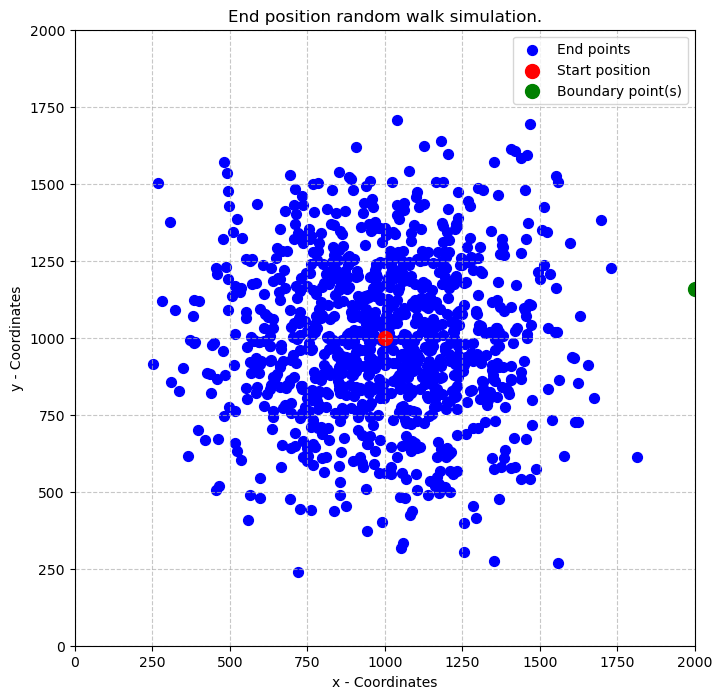

In [94]:
import time 
import numpy as np
import matplotlib.pyplot as plt

#Initialize 1000 particles at (1000,1000)
def start_pos_f(n = 1_000, start_pos=(1_000,1_000)):
    start_pos = np.array(start_pos)
    pos = np.ones((n, 2)) * start_pos
    return pos

def one_step(arr):
    directions = np.random.randint(0, 5, size=len(arr))

    # At each step move or dont move. Only moves along one of the axis.
    dx = np.array([0, 1, -1, 0, 0])
    dy = np.array([0, 0, 0, 1, -1])
    arr += np.stack([dx[directions], dy[directions]], axis=1)
    return arr

def rndm_walk_plain(n_steps, n_walkers=1_000, lower_bound=0, higher_bound=2_000):
    k=0
    pos = start_pos_f(n_walkers)
    t0 = time.perf_counter()
    
    for _ in range(n_steps):
        
        pos = one_step(pos)
        k+=1 
        # Ensure that the particle's movement doesn't exceed boundaries.
        if np.any(pos <= lower_bound) or np.any(pos >= higher_bound):
            break
    t1 = time.perf_counter()
    t = t1-t0
        
    return pos, k, t

def plot_positions_matplotlib(
        array, 
        title, 
        xlim=(0, 2000), 
        ylim=(0, 2000), 
        start_pos=(1000, 1000), 
        boundary=True,
        x_label="x - Coordinates", 
        y_label = "y - Coordinates",
        
        ):
    
    if boundary:
        boundary_points_x = xlim
        boundary_points_y = ylim
        mask_boundary = (
            (array[:, 0] <= boundary_points_x[0]) | (array[:, 0] >= boundary_points_x[1]) |
            (array[:, 1] <= boundary_points_y[0]) | (array[:, 1] >= boundary_points_y[1])
        )

        boundary_points = array[mask_boundary]
    else:
        boundary_points = np.empty((0, array.shape[1]))


    plt.figure(figsize=(8, 8))
    plt.scatter(array[:,0], array[:,1], color='blue', s=50, label = 'End points')  # s = dot size
    plt.scatter(start_pos[0], start_pos[1], color='red', s=100, label='Start position')  # Start position in red
    if not boundary_points.size == 0: 
        plt.scatter(boundary_points[:, 0], boundary_points[:, 1], color='green', s=100, label='Boundary point(s)')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

n_walkers=1000
pos, k_plain, t = rndm_walk_plain(n_steps=1_000_000, n_walkers=n_walkers, lower_bound=0, higher_bound=2000)
avg_per_plain = t/(n_walkers * k_plain)
print(f"Number of steps taken: {k_plain}. Average time per step per walker: {avg_per_plain*1e6:.6f} microseconds.")
plot_positions_matplotlib(pos,title=f"End position random walk simulation.")

Stopping the iterations when reaching the boundaries, and plotting the end points of all the runs. By running the code multiple times we can see that the number of runs needed to hit the boundary often is between 150000 and 200000 steps. We are also noting that the code takes some time to run, "only with" 200000 iterations. 
***
**2. Probability-Weighted Movement:**  
*Modify the program to define different probabilities for a particle moving (or not) in the x and y directions. In 2D, there should be a total of nine possible movement directions, including staying in place. Each movement is associated with a defined probability.* 
• *Verify that the sum of all movement probabilities equals 1.*  
  
***Solution 1.2:*** Assuming that we now can move diagonally (Because we now have nine movements). 

Number of steps taken: 104896. Average time per step per walker: 0.063121 microseconds.


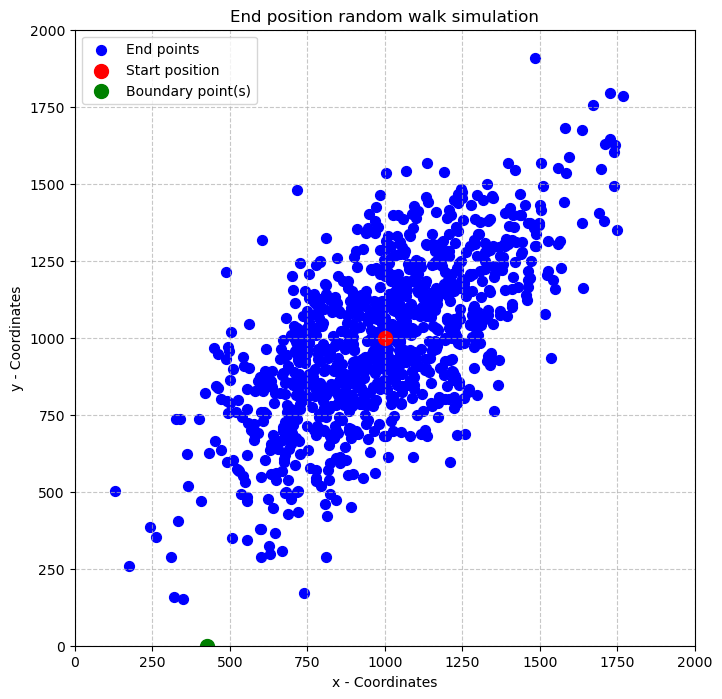

In [95]:
def one_step_mod(
        arr,
        p_ss=1/9, #0
        p_ps=1/9, #1
        p_sp=1/9, #2
        p_pp=1/9, #3
        p_ns=1/9, #4
        p_sn=1/9, #5
        p_nn=1/9, #6
        p_np=1/9, #7
        p_pn=1/9  #8
                 ):
        # Don't check probabilities each time step for improved computation.
        p = [p_ss, p_ps, p_sp, p_pp, p_ns, p_sn, p_nn, p_np, p_pn]


        directions = np.random.choice(9, size=len(arr), p=p)
        dx = np.array([0, 1, 0, 1, -1, 0, -1, -1, 1])
        dy = np.array([0, 0, 1, 1, 0, -1, -1, 1, -1])
        arr += np.stack([dx[directions], dy[directions]], axis=1)
        return arr


def rndm_walk_mod(n_steps, n_walkers=1_000, lower_bound=0, higher_bound=2_000, start_pos=(1_000,1_000),
        p_ss=1/9, #0
        p_ps=1/9, #1
        p_sp=1/9, #2
        p_pp=1/9, #3
        p_ns=1/9, #4
        p_sn=1/9, #5
        p_nn=1/9, #6
        p_np=1/9, #7
        p_pn=1/9  #8
                  ):
    p = [p_ss, p_ps, p_sp, p_pp, p_ns, p_sn, p_nn, p_np, p_pn]
    
    # Check if the sum is equal to 1, with a little round off error.
    if not np.isclose(sum(p), 1.0, atol=1e-8):
        raise ValueError(f"Probabilities must sum to 1. Current sum: {sum(p)}")

    k=0
    pos = start_pos_f(n_walkers, start_pos)
    t0 = time.perf_counter()
    for _ in range(n_steps):
        pos = one_step_mod(pos, *p)
        k+=1 
        if np.any(pos <= lower_bound) or np.any(pos >= higher_bound):
            break
    t1 = time.perf_counter()
    t = t1-t0
    return pos, k, t

pos_mod, k_mod, t_mod = rndm_walk_mod(n_steps=1_000_000, n_walkers=1_000, lower_bound=0, higher_bound=2000, p_pp=2/9,p_pn=0, p_nn=2/9 ,p_np=0)
avg_per_mod = t_mod/(1_000 * k_mod)
print(f"Number of steps taken: {k_mod}. Average time per step per walker: {avg_per_mod*1e6:.6f} microseconds.")
plot_positions_matplotlib(pos_mod,title=f"End position random walk simulation")

Modifying the probabilities and ending the iterations when reaching the boundary. We can see that despite decreasing the number of iterations used, we still see a higher number for the average time per step per walker. 
We also see a lower number of steps needed to reach the boundary because of the modification we have made with the probabilities. This occurs because weighted probabilities introduce directional bias, which can increase or decrease the likelihood of shorter excursions before reaching the boundary (dependent on what type of boundary). With certain directions becoming more probable (We increased probability of direction $[1,1]$ and $[-1,-1]$, while removing probability of walking the other diagonal), walkers spend more time moving along preferred axes rather than diffusing uniformly, leading to systematically shorter path lengths.

***

### Part 2. 2D Random Walk Model of Contaminant Transportin Aquifers  
**Description:** *Simulate the spread of contaminants in an aquifer using a random walk model and assess contamination risk at varying distances from the source.*   
1. **Define Contaminant Source:** *The contaminant source is located at the central grid point:* 
$$
x = 1000, y = 1000
$$  
*(See Figure 2). Each grid unit represents 10 meters.*    
***Solution 2.1:***

In [96]:
start_point = (1000,1000)

***
2. **Worst-Case Scenario** *A worst-case scenario is defined as the contaminant moving in a straight line toward the target distance without any random deviation, at the maximum possible average migration rate of 10 m/year. Calculate the minimum time required for the contaminant to reach a distance of 10 km from the source under this assumption.*  
  
***Solution 2.2:***

We have distance moved per year, and the distance. We can then calculate the minimum time, if the contaminant is moving in a straight line towards the target.  
$$
t = \frac sv=\frac{10000m}{10m/year}=1000years 
$$  

***
  
3. **Simulate Contaminant Spread:** *Implement a 2D random walk where each step moves the contaminant by one grid unit in one of four directions (North, South, East, West) with equal  probability. Simulate the spatial distribution after a fixed number of steps and visualize the concentration map.*  
  

4. **Time to Reach 10 km (Unbiased Random Walk):** *Assume the contaminant moves randomly at an average of 10 m/year.*  
* *Run at least 10 independent simulations and record the time (in years) when the contaminant first reaches a distance of 10 km from the source.*  
* *Plot a histogram of these arrival times.*
* *Determine whether the arrival times approximate a normal distribution.*  
  

5. **Introduce Net Transport (Biased Random Walk):** *Modify the movement probabilities so that the probability of moving South is twice the probability of moving North, while East and West remain equal. Then:*  
* *Simulate 100 runs and plot a histogram of arrival times for reaching 10 km South.*
* *Determine whether the arrival times approximate a normal distribution.*
* *Compare contamination risk for unbiased vs biased cases by computing the ratio of their most likely arrival times for reaching 10 km South.*  
  
***Solution 2.3:***  
We use the grid as a map, and call positive x-direction for east, negative x-direction for west, postitive y-direction for north and negative y-direction for south.

 We also see that the code could use some optimalization by using a more vectorized approach. The difference between these parts and the first part is that we are going to see more steps needed before reaching the boundary. We have the same boundary value ($1000$ grid coordinates), but we are now going to check for when they all reach, and not just the first one. This will cause the number of steps to increase drastically, and we would like to decrease the for-iterations with generation of random numbers, which are heavy operands.
 We therefore implement a chunk size that we create the numpy random generated numbers from (instead of many times in the for loop), and then run over number of runners instead (because this number is much lower). 

In [97]:
import numpy as np
start_point = (1000,1000)
def simulate_path_vec(
        start_point=start_point, 
        p=[0.2, 0.2, 0.2, 0.2, 0.2], 
        n_steps=10000, 
        distance_boundary=True,
        boundary=1000, #Not used if distance_boundary=False
        fixed_boundary=False,
        lower_bound=(0,0), #Not used if fixed_boundary=False
        upper_bound=(2000,2000), #Not used if fixed_boundary=False
        trajectory=False, 
        multiply_factor=1, 
        continue_from_last=False, 
        main_start=(0,0), #Not used if continue from last

        ):
    # Validate probabilities
    if len(p) != 5 or not np.isclose(sum(p), 1.0):
        raise ValueError("Probabilities must be 5 values summing to 1.")
    
    
    directions = np.random.choice(5, size=n_steps, p=p)

    # Direction arrays. 0 is stay, 1 is east (right), 2 is left(west), 3 is up(north), 4 is down(south).
    # Multiply factor to scale step sizes.
    dx = np.array([0, 1, -1, 0, 0])
    dy = np.array([0, 0, 0, 1, -1])

    # Create steps based on random directions
    steps_x = dx[directions]
    steps_y = dy[directions]

    # Cumulative sum for path away from start point(to find distance)
    path_x = np.cumsum(steps_x) 
    path_y = np.cumsum(steps_y) 
    

    if continue_from_last: # Adjust path to continue from last position, to find correct distance
        
        path_x +=  (start_point[0] - main_start[0])
        path_y +=  (start_point[1] - main_start[1])
    else:
        main_start=start_point
    

    # Calculate distances and find first index exceeding boundary. Depending on what type of boundary conditions are set.
    # Using only squared distances to avoid unnecessary sqrt computations for distance comparisons.
    # Don't want to compute unessecary, that's why we have the masks and computations inside each of the if-statements.
    if distance_boundary and not fixed_boundary:
        dist2 = (multiply_factor*path_x)**2 + (multiply_factor*path_y)**2
        mask = dist2 >= boundary**2
        idx = np.flatnonzero(mask)[0] if mask.any() else -1 

    elif distance_boundary and fixed_boundary:
        dist2 = (multiply_factor*path_x)**2 + (multiply_factor*path_y)**2
        mask_boundary = dist2 >= boundary**2
        pos_x = path_x + main_start[0]
        pos_y = path_y + main_start[1]
        mask_x = (pos_x *multiply_factor <= lower_bound[0]) | (pos_x *multiply_factor >= upper_bound[0])
        mask_y = (pos_y *multiply_factor <= lower_bound[1]) | (pos_y *multiply_factor >= upper_bound[1])
        mask = mask_boundary | mask_x | mask_y
        idx = np.flatnonzero(mask)[0] if mask.any() else -1 

    elif not distance_boundary and fixed_boundary:
        pos_x = path_x + main_start[0]
        pos_y = path_y + main_start[1]
        mask_x = (pos_x *multiply_factor <= lower_bound[0]) | (pos_x *multiply_factor >= upper_bound[0])
        mask_y = (pos_y *multiply_factor <= lower_bound[1]) | (pos_y *multiply_factor >= upper_bound[1])
        mask = mask_x | mask_y
        idx = np.flatnonzero(mask)[0] if mask.any() else -1 

    else:
        idx = -1

    if trajectory:
        if idx == -1:
            trajectory = np.column_stack((path_x + main_start[0], path_y + main_start[1]))
        else:
            trajectory = np.column_stack((path_x[:idx+1]+main_start[0], path_y[:idx+1]+main_start[1]))



    return {
        "final_position": (path_x[idx]+main_start[0], path_y[idx]+main_start[1]),
        "steps": idx,
        "trajectory": trajectory
    }

def simulate_path(
        start_point=(1000,1000), 
        p=[0.2, 0.2 ,0.2 ,0.2 ,0.2], 
        n_it_per=1000, 
        distance_boundary=True,
        boundary=1000, 
        fixed_boundary=False,
        lower_bound=(0,0),
        upper_bound=(2000,2000),
        trajectory=False, 
        multiply_factor=1
        ):
    idx = -1
    k = -n_it_per # To offset the first addition
    main_start = start_point
    trajectory_saved = []
    cont = False
    while idx == -1:
        dict = simulate_path_vec(
            start_point, 
            p=p, 
            n_steps=n_it_per, 
            distance_boundary=distance_boundary,
            boundary=boundary, #Not used if distance_boundary=False
            fixed_boundary=fixed_boundary,
            lower_bound=lower_bound, #Not used if fixed_boundary=False
            upper_bound=upper_bound, #Not used if fixed_boundary=False
            trajectory=trajectory, 
            multiply_factor=multiply_factor, 
            continue_from_last=cont, 
            main_start=main_start,
        )
        idx = dict["steps"]
        start_point = dict["final_position"]
        if trajectory:
            trajectory_saved.append(dict["trajectory"])
        k += n_it_per
        cont = True

    dict["steps"] = k + dict["steps"]
    if trajectory:
        dict["trajectory"] = trajectory_saved
    
    return dict


First we are testing to see what chunk size gives the fastest computations. This would depend on the number of total iterations needed, but for an estimate we check what is best to reach a distance away of $10km$, or $1000$ grid coordinates.

Best step size intervals: 21544
Lowest mean time per run: 0.0238 s. Gives time per step per run: 0.028224 microseconds.


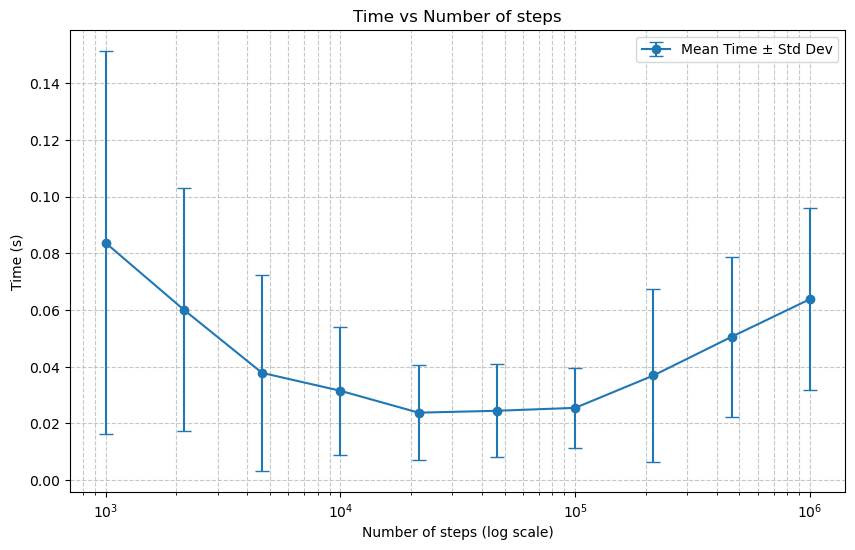

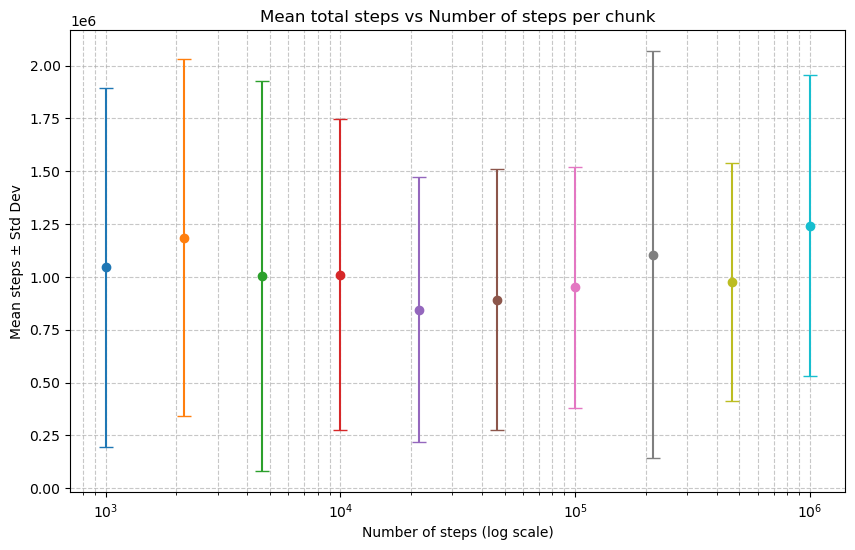

In [98]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_runs = 20
n_it_per_chunk = np.logspace(3, 6, num=10, dtype=int)  # different n_it_per to test
p = [0, 0.25, 0.25, 0.25, 0.25] 
boundary = 10_000
multiply_factor = 10
start_point = (1000, 1000)

timing_results = {}


for n_it in n_it_per_chunk:
    times = []
    steps = []
    
    for _ in range(n_runs):
        t0 = time.perf_counter()
        result = simulate_path(
            start_point=start_point,
            p=p,
            n_it_per=n_it,
            boundary=boundary,
            trajectory=False,
            multiply_factor=multiply_factor
        )
        t1 = time.perf_counter()
        times.append(t1 - t0)
        steps.append(result["steps"])
    timing_results[n_it] = {
        "time_mean_s": np.mean(times),
        "time_std_s": np.std(times),
        "steps_mean": np.mean(steps),
        "steps_std": np.std(steps)
    }

def plot_times_vs_steps(timing_results):
    n_steps = list(timing_results.keys())
    times = [timing_results[n]['time_mean_s'] for n in n_steps]
    time_stds = [timing_results[n]['time_std_s'] for n in n_steps]

    plt.figure(figsize=(10, 6))
    plt.errorbar(n_steps, times, yerr=time_stds, fmt='o-', capsize=5, label='Mean Time ± Std Dev')
    plt.xscale('log')
    plt.xlabel("Number of steps (log scale)")
    plt.ylabel("Time (s)")
    plt.title("Time vs Number of steps")
    plt.grid(True, which="both", linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()
    
def plot_steps_vs_nit(timing_results):
    plt.figure(figsize=(10, 6))
    for n_it, stats in timing_results.items():
        plt.errorbar(
            [n_it], [stats['steps_mean']],
            yerr=[stats['steps_std']],
            fmt='o', capsize=5
        )
    
    plt.xscale('log')
    plt.xlabel("Number of steps (log scale)")
    plt.ylabel("Mean steps ± Std Dev")
    plt.title("Mean total steps vs Number of steps per chunk")
    plt.grid(True, which="both", linestyle='--', alpha=0.7)
    plt.show()

# Find the n_it with the lowest mean time
best_n_it = min(timing_results, key=lambda k: timing_results[k]["time_mean_s"])

# Get the corresponding values
lowest_mean_time = timing_results[best_n_it]["time_mean_s"]
corresponding_steps_mean = timing_results[best_n_it]["steps_mean"]


print(f"Best step size intervals: {best_n_it}")
print(f"Lowest mean time per run: {lowest_mean_time:.4f} s. Gives time per step per run: {lowest_mean_time/corresponding_steps_mean*1e6:.6f} microseconds.")
plot_times_vs_steps(timing_results)
plot_steps_vs_nit(timing_results)

We can see from the graphs that the distributions are heavily affected by a high variance. We will see this later in the problem, but now we see that the choice of chunk size is giving the lowest computation times at around 10000-50000 steps per run for this boundary. 
From the plot, we can see that the time per step per run has decreased compared to previous methods, even though the average number of steps per run is much higher. This improvement is likely because we reduced the number of Python-level for loops, which are computationally expensive, and instead used more efficient operations. When the number of steps is very large and the number of walkers (runners) is relatively small, it can be more efficient to generate random numbers in bulk along each path rather than across all walkers—if we need to choose one approach. This minimizes loop overhead and leverages vectorized operations.  
Alternatively, we could design a solution that generates large chunks of random numbers both along and across walkers for maximum speed. However, because the total number of iterations is extremely high, this approach would require a huge amount of RAM and could lead to memory issues.  
We now continue with creating paths for $150 000$ steps over $500$ runs, to simulate the spatial distribution and the concentration map. We are using all the path positions to create the concentration map, and not just the end points.  
The recordings we obtain will be the trajectory, which is the positions each individual run has had through the run. And we will obtain the final positions, which is the simulated position in 10 meters that the contaminants have after $150 000$ years (number of steps).  
The plots illustrate the simulated contaminant density across all years (how many visits each positions has had) and display the final positions of the contaminants at the end of the simulation.

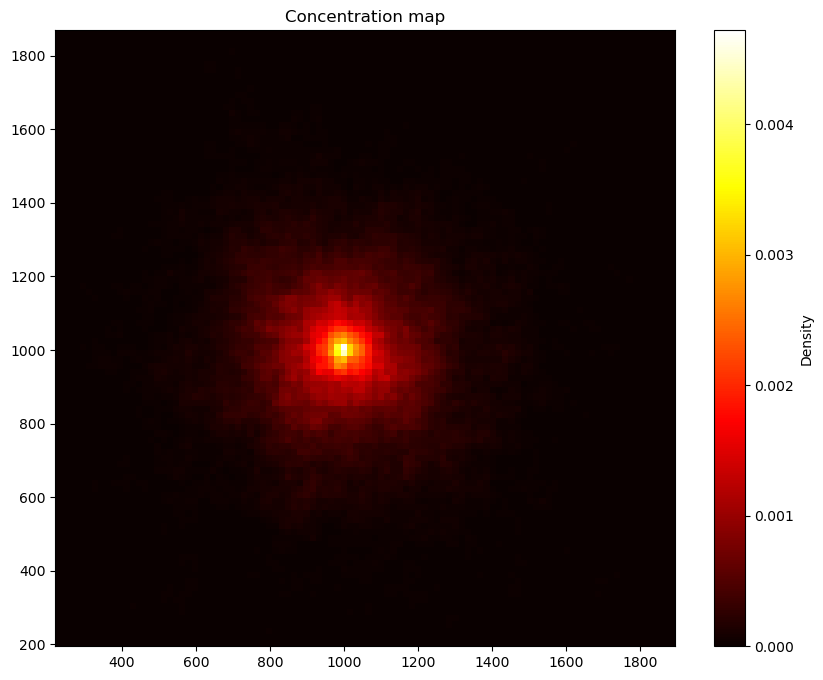

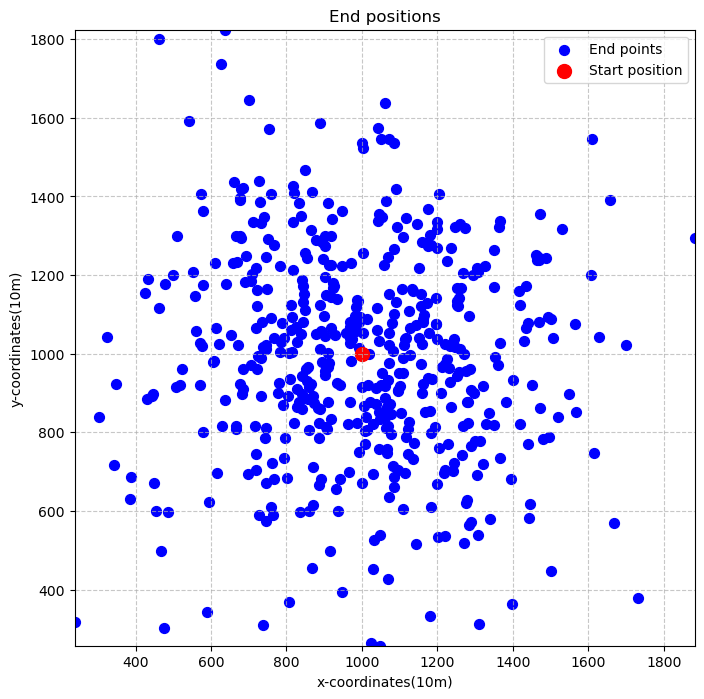

In [85]:
import matplotlib.pyplot as plt

n_runs=500
positions = []
end_positions = []
for _ in range(n_runs):
    
    dict = simulate_path_vec(
            start_point=(1000,1000),
            p=[0, 0.25, 0.25, 0.25, 0.25],
            n_steps=150_000,
            distance_boundary=False,
            trajectory=True,
            multiply_factor=10
        )
    
    positions.append(dict["trajectory"])
    end_positions.append(dict["final_position"])
    
positions = np.vstack(positions)
end_positions = np.vstack(end_positions)

x = positions[:, 0]
y = positions[:, 1]

# Compute heatmap
def create_heatmap(x,y):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=(100, 100))
    heatmap = heatmap/heatmap.sum()
    plt.figure(figsize=(10, 8))
    plt.imshow(
        heatmap.T,
        origin='lower',
        cmap='hot',
        aspect='auto',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]  
    )
    plt.colorbar(label='Density')
    plt.title("Concentration map")
    plt.show()
create_heatmap(x,y)

xlim_ep=min(end_positions[:,0]), max(end_positions[:,0])
ylim_ep=min(end_positions[:,1]),max(end_positions[:,1])
plot_positions_matplotlib(end_positions, title="End positions", xlim=xlim_ep, ylim=ylim_ep, boundary=False,                          
                          x_label="x-coordinates(10m)", 
                          y_label="y-coordinates(10m)",)


From the plots we can see the concentration is decreasing gradually over the distance from the starting position. The end positions also show an even spread out from the start point, with less density the longer away from the start that we walk. 
One can also look at the concentration map as an approximated probability that a single contaminant have visited a certain point $150 000$ years after it has been released.
***
***Solution 2.4:*** 


The lowest simulated number of years used to reach 10km away from center, of 200 number of walkers: 143744


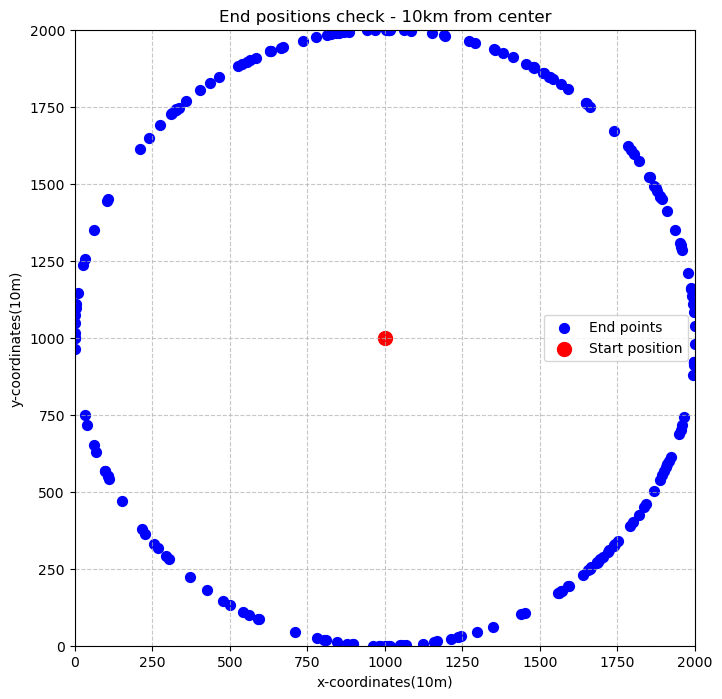

In [86]:
n_runs=200
arrival_steps = []
end_positions_unbiased = []
for _ in range(n_runs):
    
    dict = simulate_path(
            start_point=(1000,1000),
            p=[0, 0.25, 0.25, 0.25, 0.25],
            n_it_per=25000,
            boundary=10_000,
            trajectory=False,
            multiply_factor=10
        )
    end_positions_unbiased.append(dict["final_position"])
    arrival_steps.append(dict["steps"])
    
    

end_positions_unbiased = np.vstack(end_positions_unbiased)
print(f"The lowest simulated number of years used to reach 10km away from center, of {n_runs} number of walkers: {min(arrival_steps)}")
plot_positions_matplotlib(end_positions_unbiased, 
                          title="End positions check - 10km from center", 
                          x_label="x-coordinates(10m)", 
                          y_label="y-coordinates(10m)",
                          boundary=False)

Here we check and see that the end distribution is around $r_{grid}=1000$, grid coordinates away from the center. This is the same as $r=1000\cdot 10m=10km$. We can see that the lowest number of years used is around $150000$ years. This is substantially more than the lowest possible route of $1000$ years.  
The probability that one specific contaminant would have used just $1000$ steps is the probability of only steps to one of the directions. This would equal to $p(X=1000)=4\cdot (\frac1{4})^{1000}$ (4 directions, and 1/4 for each step a thousand times), which is an extremely low probability. For $1001$ steps, the probability is slightly higher, but still very close to zero. This illustrates why the actual number of steps tends to be much larger than the theoretical minimum. 
To determine whether the plot of the arrival years follows a normal distribution, we use histogram and Q-Q-plot. A Q-Q plot is a graphical tool used to assess whether a dataset follows a normal distribution. To use it, you plot the quantiles of your sample data against the quantiles of a normal distribution. If the data is approximately normal, the points will align closely along a straight line. Adding a regression line through the plotted points helps to visualize this.

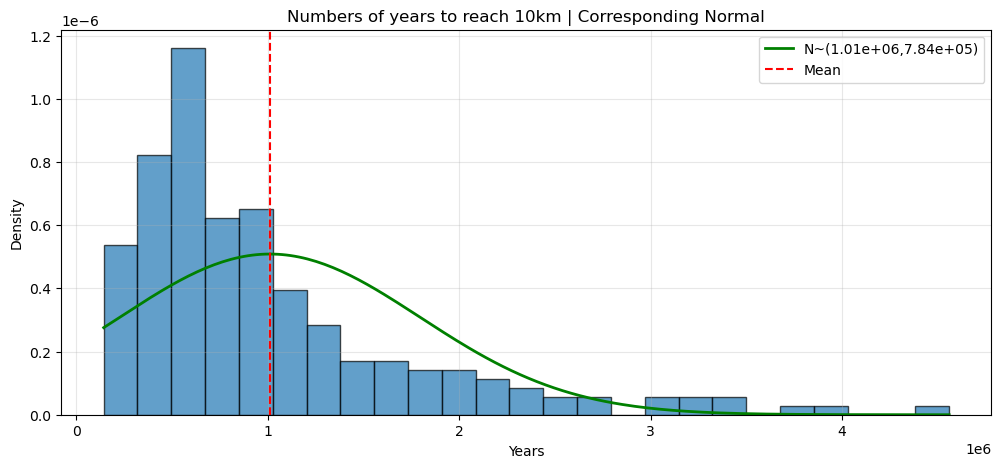

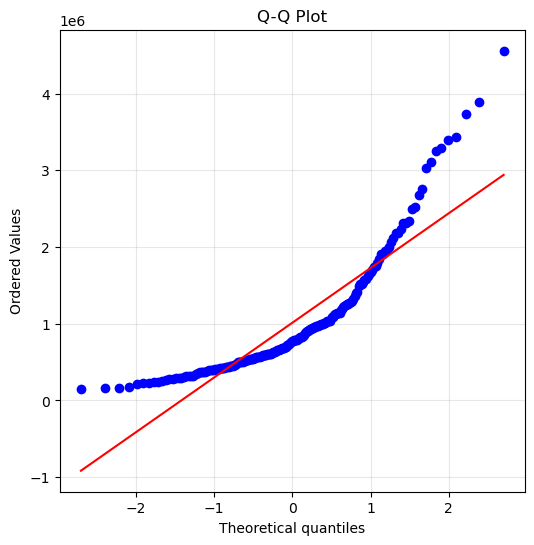

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, probplot #For deciding if the distribution can be approximated to a normal distribution.



def plot_hist_and_check_normality(k, title="Histogram"):
    
    mu = np.mean(k)
    sigma = np.std(k)
    x = np.linspace(min(k), max(k), 200)
    pdf = norm.pdf(x, mu, sigma)


    plt.figure(figsize=(12,5))
    plt.plot(x, pdf, color='green', linewidth=2, label=f"N~({mu:.2e},{sigma:.2e})")
    plt.hist(k, bins=25, color='C0', edgecolor='k', alpha=0.7, density=True)
    plt.axvline(np.mean(k), color='red', linestyle='--', label=f"Mean")
    plt.xlabel("Years")
    plt.ylabel("Density")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

def qq_plot(k, title="Q-Q Plot"):
    plt.figure(figsize=(6,6))
    probplot(k, dist="norm", plot=plt)
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.show()

    

plot_hist_and_check_normality(arrival_steps, "Numbers of years to reach 10km | Corresponding Normal")
qq_plot(arrival_steps)


From the histogram and the plot, we can see that we get a mean around $ \mu \approx 1 \text{Million years}$. We can also clearly see a heavy tail, suggesting that a normal distribution is not a good approximation of the distribution. The Q-Q plot with the regression line also confirms this, as we can see that the points are following a more shaped line instead of a straight line. The reason we don’t see a normal distribution is because of the properties of the random walk. To reach the boundary, the contaminant often needs to take a very large number of steps. While many paths are relatively short, some particles wander in the center for a long time before eventually hitting the boundary, which creates extremely long travel times. This leads to a heavy-tailed distribution rather than a symmetric one like the normal distribution.  
***
***Solution 2.5:***
10 km south means reaching the x-axis, i.e. y=0.

In [88]:
n_runs=100
arrival_steps_mod = []
y_vals = []

for _ in range(n_runs):
    
    dict = simulate_path(
            start_point=(1000,1000),
            p=[0, 0.25, 0.25, 0.5/3, 0.5*2/3],
            n_it_per=25000,
            distance_boundary=False,
            fixed_boundary=True,
            lower_bound=(-50000,0), #To not hit lower x-boundary
            upper_bound=(50000,50000), #To not hit upper boundary
            trajectory=False,
            multiply_factor=10
        )
    
    y_vals.append(dict["final_position"][1])
    arrival_steps_mod.append(dict["steps"])
    
    
y_vals = np.array(y_vals)
print(f"Are all y-values final position equal to 0? {np.all(y_vals == 0)}")

Are all y-values final position equal to 0? True


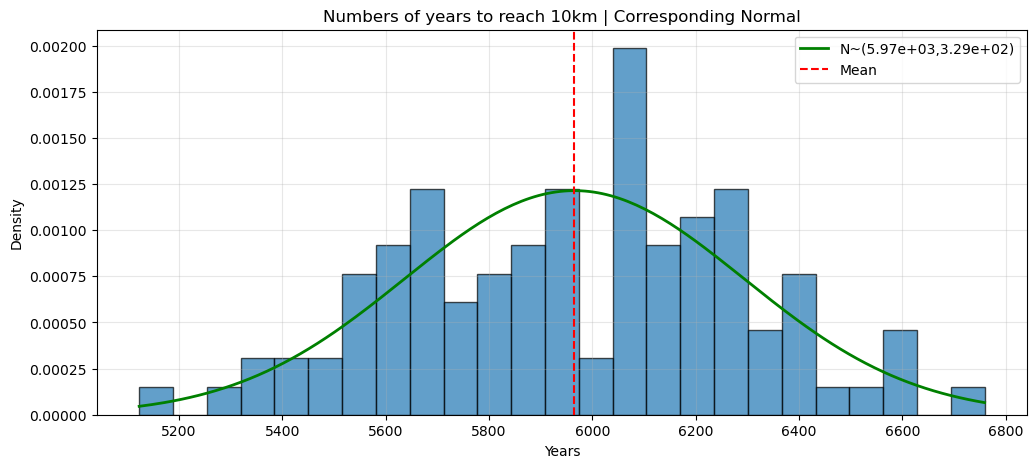

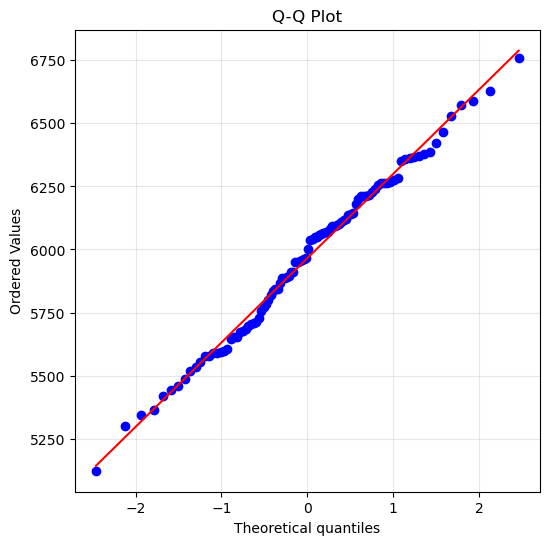

In [89]:
plot_hist_and_check_normality(arrival_steps_mod, "Numbers of years to reach 10km | Corresponding Normal")
qq_plot(arrival_steps_mod)

In [90]:
# Simualted arrival times
mu_unbiased = np.mean(arrival_steps)
mu_biased   = np.mean(arrival_steps_mod)
ratio = mu_unbiased / mu_biased
print(mu_unbiased, mu_biased, ratio)

1011782.425 5965.11 169.61672542501313


Based on the simulated mean arrival times, the biased random walk reaches the 10km boundary approximately 173 times faster than the unbiased walk.
This quantifies the effect of a net groundwater flow on contaminant transport speed. 

# Summary
The simulations show that Monte Carlo methods reproduce deterministic behaviour on average while also revealing how uncertainty evolves in time and space. For the single tank, the mean concentration followed the analytical exponential decay almost exactly, and the standard deviation behaved as expected. In the three-tank system, the mean and variability shifted downstream, demonstrating how uncertainty spreads through interconnected tanks. The deterministic ODE predictions were almost identical to the Monte Carlo mean curves, which shows that the stochastic simulations behave as expected and accurately reproduce the underlying system dynamics on average.

The 2D aquifer model showed much stronger effects of randomness. Unbiased random walks produced broad spreading and extremely long arrival times (on the order of one million years), while introducing a directional bias reduced arrival times by more than two orders of magnitude. These results show how stochastic simulations capture both average behaviour and the range of possible outcomes, making them valuable tools when system parameters or transport paths are uncertain.